In [1]:
import re
import pandas as pd
import graph_tool.all as gt

In [3]:
data = '../../data/uk/raw'

In [4]:
spons = pd.read_csv(f'{data}/sponsors.csv', sep=';')
cspon = pd.read_csv(f'{data}/cosponsorships.csv', header=None,
                    sep=';', names=['primary', 'cosponsor'])

In [15]:
g = gt.Graph(directed=False)
g.vp['name'] = g.add_edge_list(spons.values, hashed=True)

parties = spons.loc[spons['name'].isin([re.sub(r"(\w)([A-Z])", r"\1 \2", name) for name in g.vp['name']])]['party']
pmap = {party: i for i, party in enumerate(spons['party'].unique())}

spons['party'] = spons['party'].str.replace(r'(\w)([A-Z])', r'\1 \2')
spons['party_num'] = spons['party'].replace(pmap)

g.vp['party'] = g.new_vp('string', parties.values)
g.vp['party_num'] = g.new_vp('int', spons['party_num'].values)

gt.remove_parallel_edges(g)
gt.remove_self_loops(g)

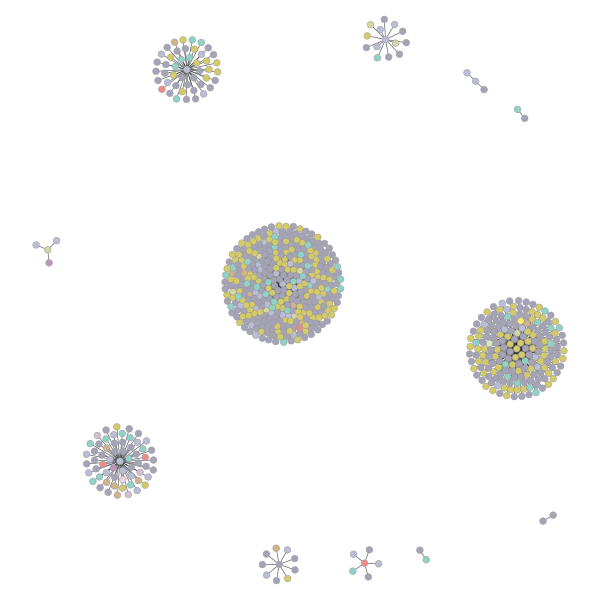

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x1260c52b0, at 0x1260c30f0>

In [16]:
gt.graph_draw(g, vertex_fill_color=g.vp['party_num'])

In [144]:
g.save('data/uk/' + 'uk.graphml')